In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('hotelreviews_with_scores.csv')
hotel_sentiments = data.groupby('Hotel_Name')[['Positive_Sentiment', 'Negative_Sentiment']].mean()
hotel_sentiments['Hotel_Score'] = (hotel_sentiments['Positive_Sentiment'] - abs(hotel_sentiments['Negative_Sentiment'])) * 50 + 50


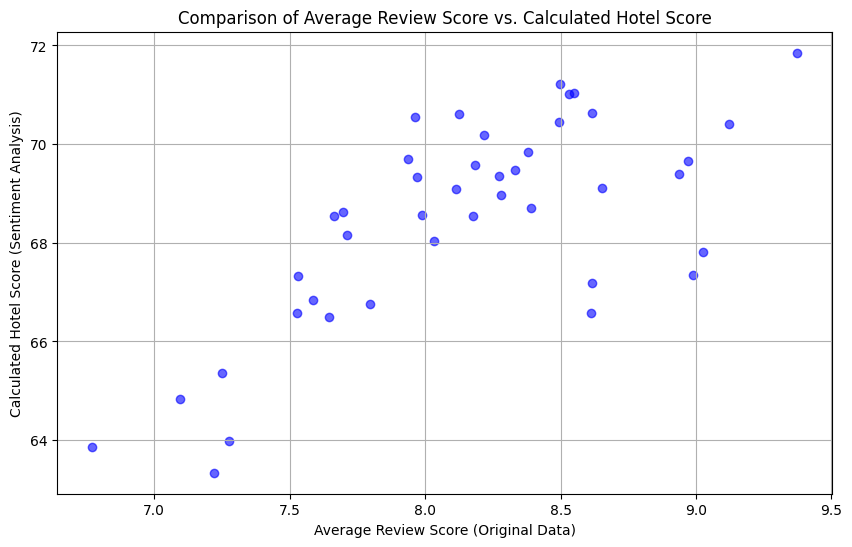

In [9]:
average_review_scores = data.groupby('Hotel_Name')['Reviewer_Score'].mean()

# Extract the calculated hotel scores from the sentiment analysis
hotel_scores = data.groupby('Hotel_Name')['Hotel_Score'].mean()

# Combine the two metrics into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Average_Review_Score': average_review_scores,
    'Calculated_Hotel_Score': hotel_scores
})

# Scatter plot comparison
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Average_Review_Score'], comparison_df['Calculated_Hotel_Score'], color='blue', alpha=0.6)
plt.title("Comparison of Average Review Score vs. Calculated Hotel Score")
plt.xlabel("Average Review Score (Original Data)")
plt.ylabel("Calculated Hotel Score (Sentiment Analysis)")
plt.grid()
plt.show()

In [10]:
data.columns

Index(['Review_Date', 'Average_Score', 'Hotel_Name', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Reviewer_Score', 'Positive_Sentiment', 'Negative_Sentiment',
       'Hotel_Score'],
      dtype='object')

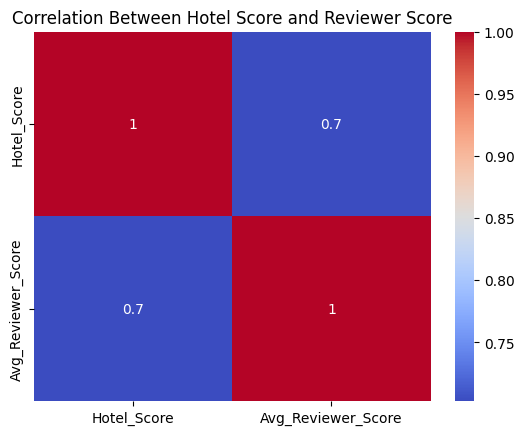

In [13]:
avg_reviewer_scores = data.groupby('Hotel_Name')['Reviewer_Score'].mean()
comparison = hotel_sentiments.merge(avg_reviewer_scores, on='Hotel_Name')
comparison = comparison.rename(columns={'Reviewer_Score': 'Avg_Reviewer_Score'})
correlation = comparison[['Hotel_Score', 'Avg_Reviewer_Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Hotel Score and Reviewer Score")
plt.show()


In [14]:
# Calculating the Pearson correlation between Hotel Score and Average Reviewer Score

from scipy.stats import pearsonr
corr, p_value = pearsonr(comparison['Hotel_Score'], comparison['Avg_Reviewer_Score'])
print(f"Correlation: {corr}, P-value: {p_value}")



Correlation: 0.7026306005621268, P-value: 2.1367435972484216e-07
